## 872. Leaf-Similar Trees

<div class="elfjS" data-track-load="description_content"><p>Consider all the leaves of a binary tree, from&nbsp;left to right order, the values of those&nbsp;leaves form a <strong>leaf value sequence</strong><em>.</em></p>

<p><img alt="" src="https://s3-lc-upload.s3.amazonaws.com/uploads/2018/07/16/tree.png" style="width: 400px; height: 336px;"></p>

<p>For example, in the given tree above, the leaf value sequence is <code>(6, 7, 4, 9, 8)</code>.</p>

<p>Two binary trees are considered <em>leaf-similar</em>&nbsp;if their leaf value sequence is the same.</p>

<p>Return <code>true</code> if and only if the two given trees with head nodes <code>root1</code> and <code>root2</code> are leaf-similar.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/09/03/leaf-similar-1.jpg" style="width: 600px; height: 237px;">
<pre><strong>Input:</strong> root1 = [3,5,1,6,2,9,8,None,None,7,4], root2 = [3,5,1,6,7,4,2,None,None,None,None,None,None,9,8]
<strong>Output:</strong> true
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/09/03/leaf-similar-2.jpg" style="width: 300px; height: 110px;">
<pre><strong>Input:</strong> root1 = [1,2,3], root2 = [1,3,2]
<strong>Output:</strong> false
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in each tree will be in the range <code>[1, 200]</code>.</li>
	<li>Both of the given trees will have values in the range <code>[0, 200]</code>.</li>
</ul>
</div>

In [1]:
import numpy as np
from typing import List, Optional
%load_ext memory_magics

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [2]:
from graphviz import Digraph
from collections import deque 

def build_tree(values):
    if not values:
        return None
    iter_values = iter(values)
    root = TreeNode(next(iter_values))
    queue = deque([root])
    while queue:
        node = queue.popleft()
        try:
            left_val = next(iter_values)
            if left_val is not None:
                node.left = TreeNode(left_val)
                queue.append(node.left)
            right_val = next(iter_values)
            if right_val is not None:
                node.right = TreeNode(right_val)
                queue.append(node.right)
        except StopIteration:
            break
    return root

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

## Solution 1

In [3]:
class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def getLeaf(root):
            if root is None:
                return []
            if not root.left and not root.right:
                return [root.val]
            else:
                left = getLeaf(root.left)
                right = getLeaf(root.right)
                return left + right
        return getLeaf(root1)==getLeaf(root2)

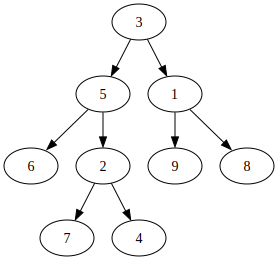

In [4]:
tree1 = build_tree(iter([3,5,1,6,2,9,8,None,None,7,4]))
plot_tree(tree1)

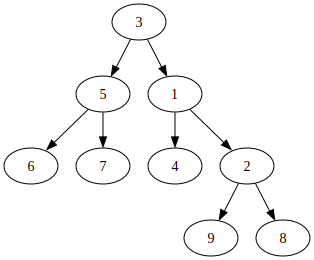

In [5]:
tree2 = build_tree(iter([3,5,1,6,7,4,2,None,None,None,None,None,None,9,8]))
plot_tree(tree2)

In [6]:
%%time
solution = Solution()
solution.leafSimilar(tree1, tree2)

CPU times: user 58 µs, sys: 12 µs, total: 70 µs
Wall time: 87 µs


True

## Solution 2

In [7]:

class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def getLeaves(root: Optional[TreeNode]) -> List[int]:
            if not root:
                return []
            stack = [root]
            leaves = []
            while stack:
                node = stack.pop()
                if node:
                    if not node.left and not node.right:
                        leaves.append(node.val)
                    else:
                        if node.right:
                            stack.append(node.right)
                        if node.left:
                            stack.append(node.left)
            return leaves

        return getLeaves(root1) == getLeaves(root2)


In [8]:
%%time
solution = Solution()
solution.leafSimilar(tree1, tree2)

CPU times: user 59 µs, sys: 13 µs, total: 72 µs
Wall time: 76.1 µs


True

## Solution 3

In [9]:
from typing import Optional, Generator
class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def getLeaves(root: Optional[TreeNode]) -> Generator[int, None, None]:
            if root:
                if not root.left and not root.right:
                    yield root.val
                else:
                    if root.left:
                        yield from getLeaves(root.left)
                    if root.right:
                        yield from getLeaves(root.right)
        
        return list(getLeaves(root1)) == list(getLeaves(root2))

In [10]:
%%time
solution = Solution()
solution.leafSimilar(tree1, tree2)

CPU times: user 95 µs, sys: 38 µs, total: 133 µs
Wall time: 135 µs


True